# 예제 2.11 matplotlib 비디오 디스플레이

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def handle_key_press(event):
    if event.key == 'escape':
        cap.release()
        plt.close()
def handle_close(evt):
    print('Close figure!')
    cap.release()

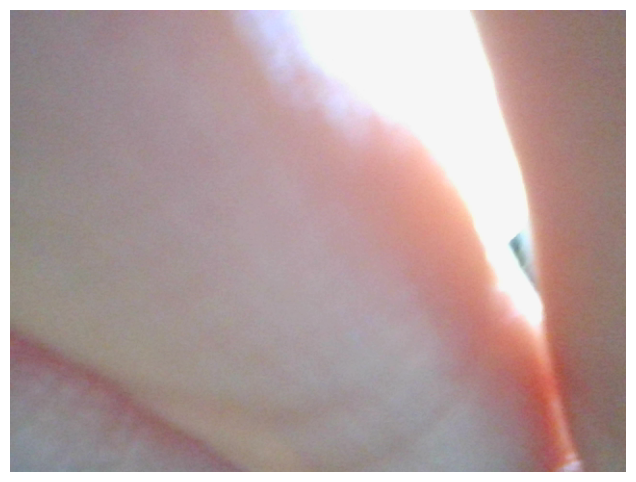

In [3]:
cap = cv2.VideoCapture(0)

plt.ion() # 대화 모드 설정
fig = plt.figure(figsize=(10, 6)) # fig.set_size_inches(10, 6)
plt.axis('off')
fig.canvas.manager.set_window_title('Video Capture')
fig.canvas.mpl_connect('key_press_event', handle_key_press)
fig.canvas.mpl_connect('close_event', handle_close)

retval, frame = cap.read()
im = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [4]:
while True:
    retval, frame = cap.read()
    if not retval:
        break
    im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    fig.canvas.draw()
    fig.canvas.flush_events()

if cap.isOpened():
    cap.release()

KeyboardInterrupt: 